# Example notebook to show how to work with sxs waveforms

In [1]:
from gw_eccentricity.load_data import load_sxs_catalogformat
from gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
# function to load modes from sxs catalog formatted waveform file
load_sxs_catalogformat?

Signature: load_sxs_catalogformat(**kwargs)
Docstring:
Load modes from sxs waveform files in sxs catalog format.

This function is intended for loading waveform modes from files in
the sxs catalog format (see
https://data.black-holes.org/waveforms/documentation.html).
For loading lvcnr format files, see `load_lvcnr_waveform`.

parameters:
----------
kwargs: Dictionary with the followings keys.
NOTE: The default values are set using
`check_kwargs_and_set_defaults_for_nr`
filepath: str
    Path to waveform file in sxs catalog format. The file should
    be named rhOverM_Asymptotic_GeometricUnits_CoM.h5, and
    contains the waveform extrapolated to future null-infinity and
    corrected for initial center-of-mass drift.
    This must be provided to load waveform modes.

deltaTOverM: float
    Time step to use for interpolating the waveform modes.  The
    unit is the same as the time array in the sxs catalog format
    waveform file which is dimensionless.

include_zero_ecc: bool
    If 

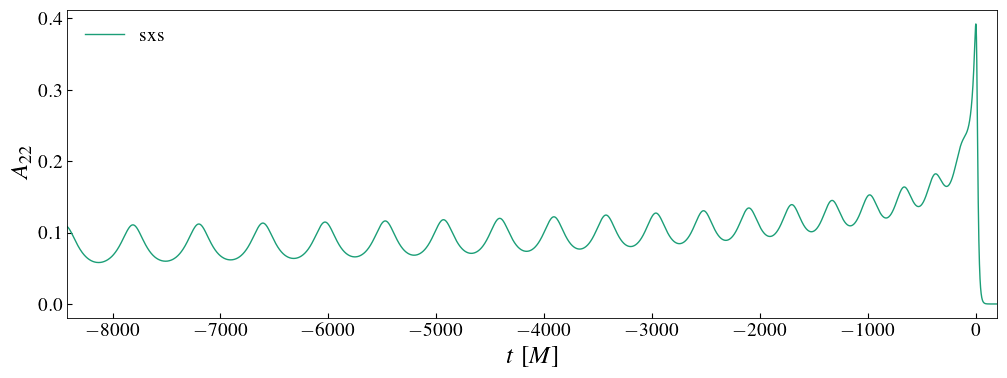

In [3]:
# Load nr data in sxs catalog format using only filepath and using defaults for other args
kwargs = {"filepath": "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5"}
dataDict = load_sxs_catalogformat(**kwargs)

# use better defaults for plotting
use_fancy_plotsettings()
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

# measure eccentricity using `AmplitudeFits` method

(<Figure size 1200x400 with 1 Axes>,
 <AxesSubplot: xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

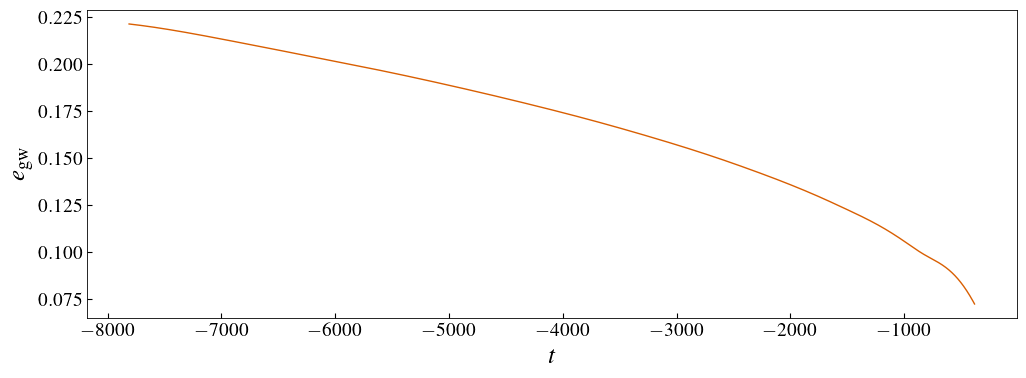

In [4]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="AmplitudeFits")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()

# Measure eccentricity with `ResidualAmplitude`

This time we need to load zeroecc data as well to compute the residual amplitude. This is done by providing additional kwargs to the waveform laodig function

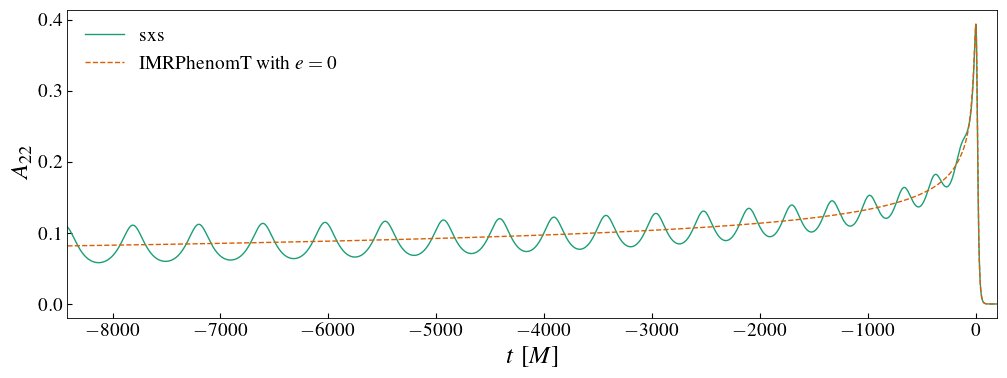

In [6]:
kwargs = {"filepath": "/home/arif/nr_data/rhOverM_Asymptotic_GeometricUnits_CoM.h5",
         "include_zero_ecc": True,
         "metadata_path": "/home/arif/nr_data/metadata.txt"}
dataDict = load_sxs_catalogformat(**kwargs)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]), label="sxs")
ax.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2, 2)]), ls="--", label=r"IMRPhenomT with $e=0$")
ax.set_xlim(dataDict["t"][0], 200)
ax.set_xlabel(labelsDict["t_dimless"])
ax.set_ylabel(labelsDict["amp22"])
ax.legend(loc="upper left")

/home/arif/gw_eccentricity/gw_eccentricity/eccDefinition.py:218: UserWarning: kw params_dict is not a recognized key word in dataDict.
  debug_message(


(<Figure size 1200x400 with 1 Axes>,
 <AxesSubplot: xlabel='$t$', ylabel='$e_{\\mathrm{gw}}$'>)

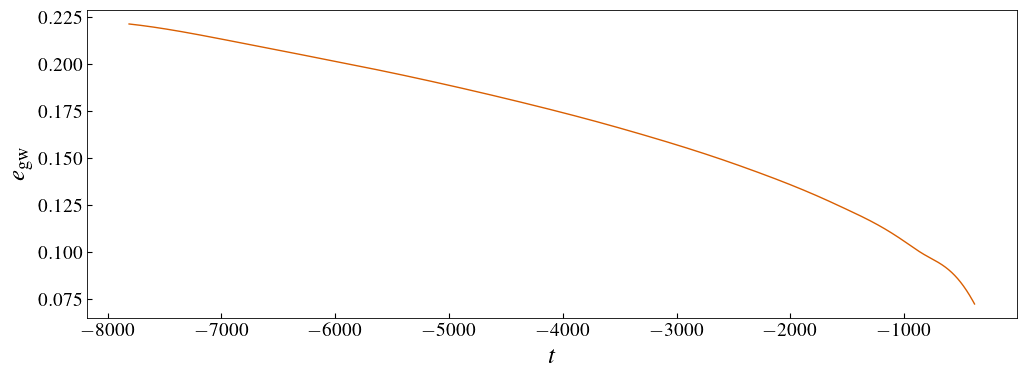

In [7]:
gwecc_dict = measure_eccentricity(tref_in=dataDict["t"],
                                  dataDict=dataDict,
                                  method="ResidualAmplitude")
gwecc_obj = gwecc_dict["gwecc_object"]
gwecc_obj.plot_eccentricity()